In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving Variables19082.csv to Variables19082 (1).csv


In [5]:
#store the data into a data frame
df = pd.read_csv('Variables19082.csv')

#Print the first 7 rows of data
df.head(7)

,User,Emp_type,Gate,Gender,Department,Country,Function,Job_ control_point,Scale,Promotions,Intern_Asig,Age,Seniority,Dependents,Job Code,Comparatio,Status
0,H238709,Regular employee,2,Male,G,India,Operations,F2-ESG,15,1,No,54,1,4,PF10,1.155543,Active
1,HBAO258,Regular employee,2,Male,C,Thailand,Operations,H2-ESG,21,2,No,47,26,1,PC11,1.212336,Active
2,HBAR605,CommuterOut-Halco,2,Male,C,Brunei,Operations,F2-ESG,15,3,Yes,47,24,0,PC10,0.702072,Active
3,HBAO792,Regular employee,1,Male,G,Brunei,Operations,C1-ESG,4,1,Yes,47,27,0,PS03,1.366488,Active
4,HBAO783,Regular employee,2,Male,D,Brunei,Operations,E2-ESG,11,1,Yes,48,25,4,CC06,1.276654,Active
5,HBAR881,Regular employee,2,Male,G,Brunei,Operations,E2-ESG,11,1,Yes,49,25,3,PS09,1.159339,Active
6,H002271,Regular employee,6,Male,B,Japan,Operations,J3-ESG,28,1,No,59,36,2,R453,0.964507,Active


In [6]:
#Get the number of rows and cols
df.shape

(1235, 17)

In [7]:
#Get the colun data types
df.dtypes

User                   object
Emp_type               object
Gate                    int64
Gender                 object
Department             object
Country                object
Function               object
Job_ control_point     object
Scale                   int64
Promotions              int64
Intern_Asig            object
Age                     int64
Seniority               int64
Dependents              int64
Job Code               object
Comparatio            float64
Status                 object
dtype: object

In [8]:
#Get a count of the empty values for each column
df.isna().sum()

User                  0
Emp_type              0
Gate                  0
Gender                0
Department            0
Country               0
Function              0
Job_ control_point    0
Scale                 0
Promotions            0
Intern_Asig           0
Age                   0
Seniority             0
Dependents            0
Job Code              0
Comparatio            0
Status                0
dtype: int64

In [9]:
# Check for any missing /null values
df.isnull().values.any()

False

In [10]:
df.describe()

,Gate,Scale,Promotions,Age,Seniority,Dependents,Comparatio
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,2.003239,16.684211,1.944939,35.384615,6.042915,1.276923,0.926760
std,1.034254,6.783814,1.101883,7.119512,5.595982,1.384474,0.282509
min,1.000000,4.000000,1.000000,21.000000,0.000000,0.000000,0.026698
25%,1.000000,11.000000,1.000000,30.000000,1.000000,0.000000,0.722233
50%,2.000000,19.000000,2.000000,34.000000,6.000000,1.000000,1.000000
75%,2.000000,21.000000,3.000000,39.000000,9.000000,2.000000,1.011152
max,6.000000,31.000000,8.000000,68.000000,40.000000,6.000000,2.978723


In [11]:
#Get a count of the number of employees that stayed and left the company
df['Status'].value_counts()

Active       999
Withdrawn    236
Name: Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


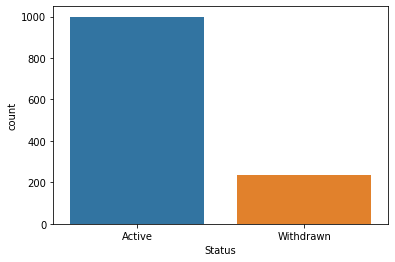

In [12]:
#Visualize the number of employees that stayed and left the company
sns.countplot(df['Status'])

In [13]:
#This is the % if we just guessed no for attrition
(1234 - 236) /1234

0.8087520259319287

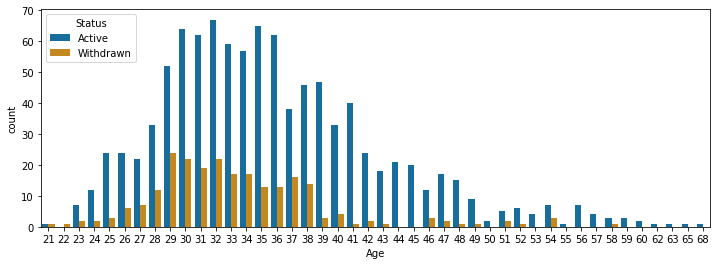

In [14]:
#Show the number of employees that left and stayed by ages
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Status', data=df, palette = 'colorblind')


In [15]:
#Print all of the data types and their unique values
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ' : ' + (df[column].unique()))
    print(df[column].value_counts())
    print('_______________________________________________________________________________________')

['User : H238709' 'User : HBAO258' 'User : HBAR605' ... 'User : HB41031'
 'User : HB44398' 'User : HB45977']
H178472    1
H244684    1
HB52474    1
H226305    1
H229983    1
          ..
H183947    1
HB89931    1
H247486    1
H227776    1
HB78725    1
Name: User, Length: 1235, dtype: int64
_______________________________________________________________________________________
['Emp_type : Regular employee' 'Emp_type : CommuterOut-Halco'
 'Emp_type : Expat-Halco' 'Emp_type : Expat-ShortTerm/Dev']
Regular employee       1104
CommuterOut-Halco        55
Expat-Halco              45
Expat-ShortTerm/Dev      31
Name: Emp_type, dtype: int64
_______________________________________________________________________________________
['Gender : Male' 'Gender : Female']
Male      1106
Female     129
Name: Gender, dtype: int64
_______________________________________________________________________________________
['Department : G' 'Department : C' 'Department : D' 'Department : B'
 'Department : A' 'D

In [16]:
df = df.drop('User', axis = 1)


In [17]:
df.corr()

,Gate,Scale,Promotions,Age,Seniority,Dependents,Comparatio
Gate,1.000000,0.579381,0.357833,0.360149,0.405046,0.249520,0.123859
Scale,0.579381,1.000000,0.212544,0.135573,0.198222,0.093186,-0.045270
Promotions,0.357833,0.212544,1.000000,0.023052,0.334594,0.071623,-0.004583
Age,0.360149,0.135573,0.023052,1.000000,0.482018,0.426733,0.307657
Seniority,0.405046,0.198222,0.334594,0.482018,1.000000,0.323660,0.217006
Dependents,0.249520,0.093186,0.071623,0.426733,0.323660,1.000000,0.242878
Comparatio,0.123859,-0.045270,-0.004583,0.307657,0.217006,0.242878,1.000000


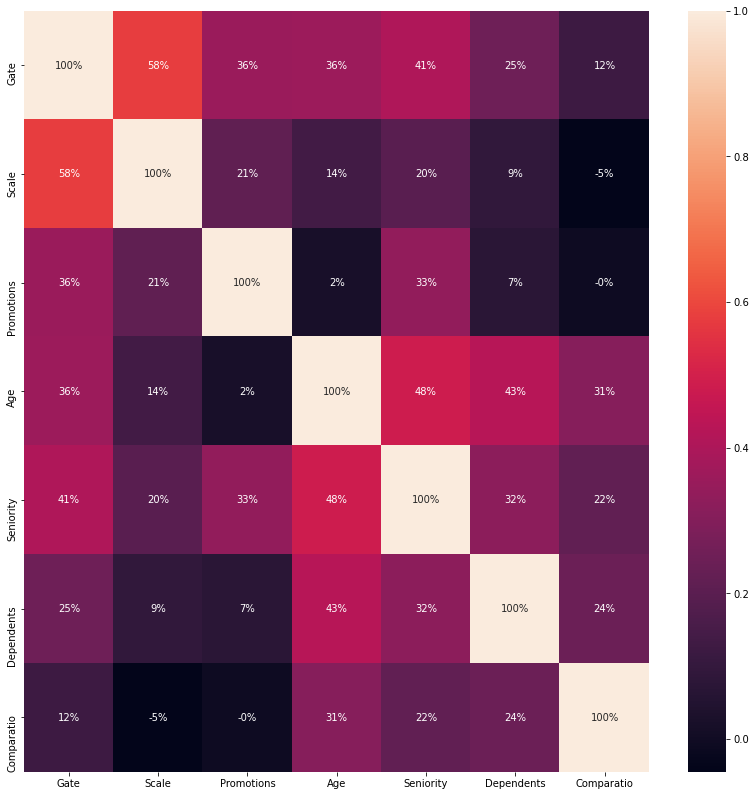

In [18]:
#Visualize the correlation
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt= '.0%')

In [19]:
#transform data
#transform non-numerical in numerical col
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [20]:
df

,Emp_type,Gate,Gender,Department,Country,Function,Job_ control_point,Scale,Promotions,Intern_Asig,Age,Seniority,Dependents,Job Code,Comparatio,Status
0,3,1,1,4,2,1,4,4,0,0,33,1,4,104,1.155543,0
1,3,1,1,2,10,1,7,8,1,0,26,26,1,96,1.212336,0
2,0,1,1,2,1,1,4,4,2,1,26,24,0,95,0.702072,0
3,3,0,1,4,1,1,0,0,0,1,26,27,0,115,1.366488,0
4,3,1,1,3,1,1,3,3,0,1,27,25,4,14,1.276654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,3,1,1,4,2,1,2,2,3,1,10,9,1,101,0.805578,1
1231,3,0,1,4,10,1,0,0,3,1,19,9,3,115,1.064711,1
1232,3,1,1,2,2,1,3,3,4,0,15,9,0,94,1.096737,1
1233,3,1,1,2,2,1,4,4,4,1,12,9,0,95,1.057486,1


In [21]:
#Split the data 
X = df.iloc[:, 1:df.shape[1]].values
Y = df.iloc[:, 0].values

In [22]:
#Split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
#Get the accurancy on the training data set
forest.score(X_train, Y_train)

0.9935205183585313

In [25]:
# Show the confusion matriz and accuracy score for the model on the test data
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Testing Accuracy = {}'.format( (TP + TN) / (TP + TN + FN + FP) ))

[[  6   0   0   7]
 [  4   5   0   3]
 [  1   0   1   6]
 [  0   0   3 273]]
Model Testing Accuracy = 0.7333333333333333
